In [106]:
# Predictive Model for Homework1 NCAA Coaches Salary Analysis (Python)
# import packages for analysis and modeling
import pandas as pd  # data frame operations

import numpy as np  # arrays and math functions
from scipy.stats import uniform  # for training-and-test split
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
import matplotlib.pyplot as plt  # 2D plotting

import seaborn as sns  # PROVIDES TRELLIS AND SMALL MULTIPLE PLOTTING

#combined Coaches/Revenue and split them where revenue data did not exist
#TNR = Teams No Revenue
#TWR = Teams With Revenue 

TNR = pd.read_csv("/Users/kenmckee/Desktop/GS/SP182/AA/HW1/TNR.csv")
TWR = pd.read_csv("/Users/kenmckee/Desktop/GS/SP182/AA/HW1/TWR.csv")
#Clean up some columns and rows from the merge. 


TWR.drop(TWR.columns[[0,1,2,3]], axis=1, inplace=True)
#not sure if this is a good idea in this case
TWR['TR'] = TWR['Total Revenue']/1000000
TWR['TE'] = TWR['Total Expenses']/1000000
TWR['TS'] = TWR['Total Subsidy']/1000000


TNR.drop(TNR.columns[0], axis=1, inplace=True)
print(len(TNR.index))
TNR = TNR.dropna(how='all')
print(len(TNR.index))
#print(pd.DataFrame.head(TWR))
print(list(TWR.columns.values))
print(list(TNR.columns.values))



21
19
['College', 'Conf', 'Coach', 'Win', 'CWin', 'Games', 'Salary', 'AvgHAtt', 'ACap', 'Agap', 'GSR', 'FGR', 'School', 'Total Revenue', 'Total Expenses', 'Total Subsidy', 'TR', 'TE', 'TS']
['College', 'Conf', 'Coach', 'Win', 'CWin', 'Games', 'Salary', 'AvgHAtt', 'ACap', 'Agap', 'GSR', 'FGR', 'School']


In [135]:
print(pd.DataFrame.head(TWR))

print(TWR['Salary'].median())
print(TWR['Salary'].var())
print(TWR['Salary'].std())
print(TWR['Salary'].skew())

      College     Conf          Coach   Win  CWin  Games  Salary  AvgHAtt  \
0       Texas   Big 12     Mack Brown  0.69  0.56     13  5.3538   100884   
1  Ohio State  Big Ten    Urban Meyer  1.00  1.00     12  4.3000   105330   
2     Alabama      SEC     Nick Saban  0.93  0.89     14  5.4767   101722   
3     Florida      SEC  Will Muschamp  0.85  0.88     13  2.4745    87597   
4    Michigan  Big Ten     Brady Hoke  0.62  0.75     13  3.0461   112252   

     ACap      Agap    ...      Total Expenses  Total Subsidy          TR  \
0  100119  1.007641    ...           133686815            0.0  150.295926   
1  104944  1.003678    ...           122286869            0.0  131.815821   
2  101821  0.999028    ...           105068152      5235300.0  124.498616   
3   88548  0.989260    ...           107157831      4367071.0  123.514257   
4  107601  1.043225    ...           111844553       272684.0  122.739052   

           TE        TS    pRevenue   pExpenses  pSubsidy   pSalary  pSala

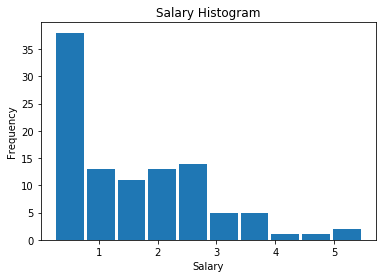

\Salary Model of TNR data frame ---------------
\Salary Model of TNR data frame ---------------
\R Model of TNR data frame ---------------
\E Model of TNR data frame ---------------
\S Model of TNR data frame ---------------
                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     33.85
Date:                Sat, 05 May 2018   Prob (F-statistic):           1.74e-25
Time:                        21:30:37   Log-Likelihood:                -88.559
No. Observations:                 102   AIC:                             197.1
Df Residuals:                      92   BIC:                             223.4
Df Model:                           9                                         
Covariance Type:            nonrobust                           

                            OLS Regression Results                            
Dep. Variable:                     TS   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     22.35
Date:                Sat, 05 May 2018   Prob (F-statistic):           7.66e-15
Time:                        21:30:37   Log-Likelihood:                -308.14
No. Observations:                 103   AIC:                             628.3
Df Residuals:                      97   BIC:                             644.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.7388     12.127      0.968      0.3

In [131]:
 #What does the Salary Distro look like?
plt.hist(TWR['Salary'], normed = False, stacked = False, rwidth = .9)
plt.title("Salary Histogram")
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()


# specify a simple model 
salarymodel = str('Salary ~ Agap + ACap + Win + GSR + FGR + CWin + FGR + TR + TE + TS')
salarymodelnr = str('Salary ~ Agap + ACap + Win + CWin + GSR + FGR')
revmodelE = str('TE ~ Salary + Agap + ACap + Win + Games')
revmodelR= str('TR ~ Salary + Agap  + ACap + Win + Games')
revmodelS= str('TS ~ Salary + Agap  + ACap + Win + Games')


# fit the model to the training set
print("\Salary Model of TNR data frame ---------------")
salary_model_fit = smf.ols(salarymodel, data = TWR).fit()
print("\Salary Model of TNR data frame ---------------")
salarynr_model_fit = smf.ols(salarymodelnr, data = TWR).fit()                    
print("\R Model of TNR data frame ---------------")
rev_model_fitR = smf.ols(revmodelR, data = TWR).fit()
print("\E Model of TNR data frame ---------------")
rev_model_fitE = smf.ols(revmodelE, data = TWR).fit()
print("\S Model of TNR data frame ---------------")
rev_model_fitS = smf.ols(revmodelS, data = TWR).fit()


# summary of model fit to the training set
print(salary_model_fit.summary())
print(salarynr_model_fit.summary())
print(rev_model_fitE.summary())
print(rev_model_fitR.summary())
print(rev_model_fitS.summary())

# training set predictions from the model fit to the training set
# I fit the prediction to the training set just to see the difference
# This is probably not a legitimate model step

print("\nContents of TNR data frame ---------------")
#This is the data that did not rev information
TNR['pRevenue'] = rev_model_fitR.fittedvalues
TNR['pExpenses'] = rev_model_fitE.fittedvalues
TNR['pSubsidy'] = rev_model_fitS.fittedvalues
TNR['pSalary'] = salary_model_fit.fittedvalues
TNR['pSalarynr'] = salarynr_model_fit.fittedvalues
print(pd.DataFrame.head(TNR))


print("\nContents of TWR data frame ---------------")
TWR['pRevenue'] = rev_model_fitR.fittedvalues
TWR['pExpenses'] = rev_model_fitE.fittedvalues
TWR['pSubsidy'] = rev_model_fitS.fittedvalues
TWR['pSalary'] = salary_model_fit.fittedvalues
TWR['pSalarynr'] = salarynr_model_fit.fittedvalues
print(pd.DataFrame.head(TWR))

print(TNR.loc[TNR['College'] == 'Syracuse'])




TWR.to_csv("/Users/kenmckee/Desktop/GS/SP182/AA/HW1/TWRout.csv")
TNR.to_csv("/Users/kenmckee/Desktop/GS/SP182/AA/HW1/TNRout.csv")

In [140]:
#Split Out Big East and Big Ten
BEast = TWR[TWR.Conf == 'Big East']
BEastn = TNR[TNR.Conf == 'Big East']

print(BEast)
print(BEastn)

B10 = TWR[TWR.Conf == 'Big Ten']
B10n = TNR[TNR.Conf == 'Big Ten']

print(B10)
print(B10n)

          College      Conf            Coach   Win  CWin  Games  Salary  \
14     Louisville  Big East   Charlie Strong  0.85  0.71     13  2.3050   
36    Connecticut  Big East  Paul Pasqualoni  0.42  0.29     12  1.6000   
41        Rutgers  Big East       Kyle Flood  0.69  0.71     13  0.7600   
54     Cincinnati  Big East      Butch Jones  0.77  0.71     13  1.7696   
55  South Florida  Big East       Skip Holtz  0.25  0.14     12  2.0000   

    AvgHAtt   ACap      Agap    ...      Total Expenses  Total Subsidy  \
14    49991  55000  0.908927    ...            81837054     10061012.0   
36    34672  40000  0.866800    ...            62993983     15029723.0   
41    49188  52454  0.937736    ...            60190100     28475523.0   
54    29138  40000  0.728450    ...            43688807     14708672.0   
55    44130  65857  0.670088    ...            43494246     16561617.0   

           TR         TE         TS   pRevenue  pExpenses   pSubsidy  \
14  87.736323  81.837054  10.061

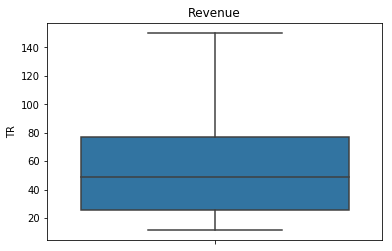

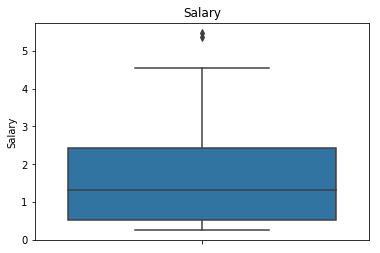

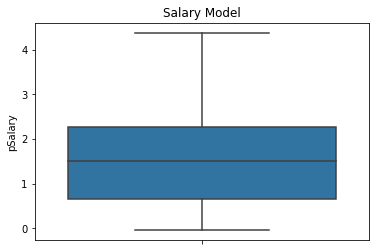

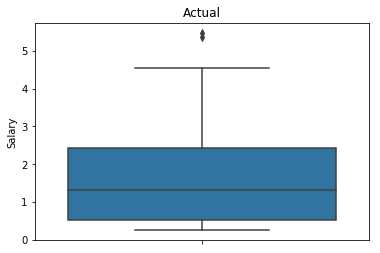

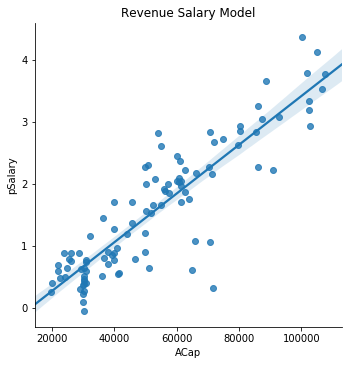

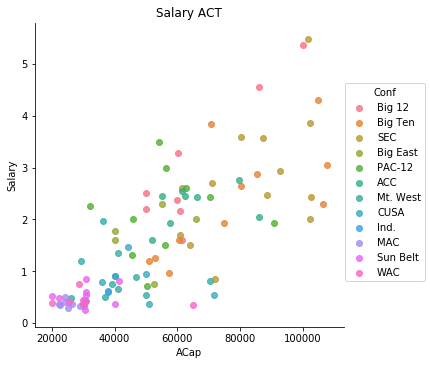

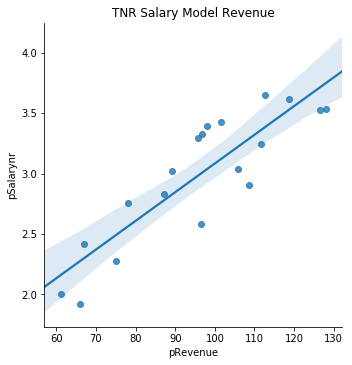

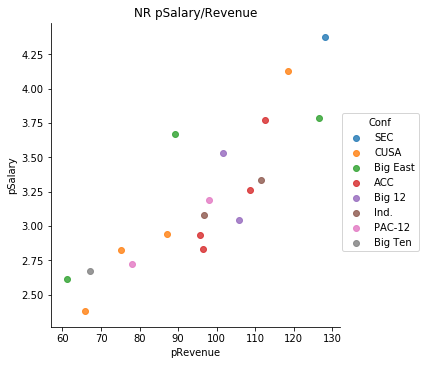

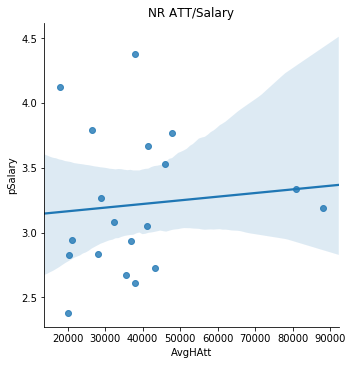

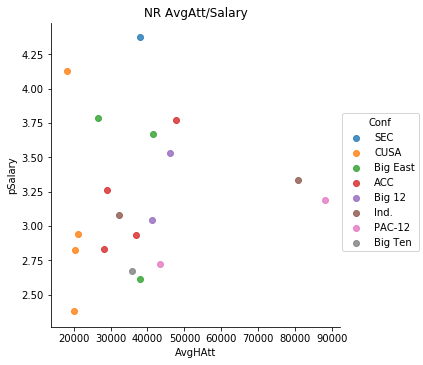

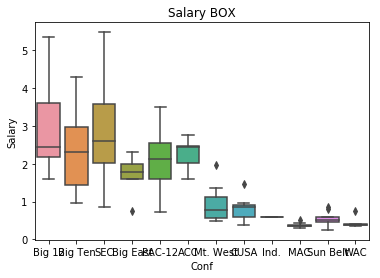

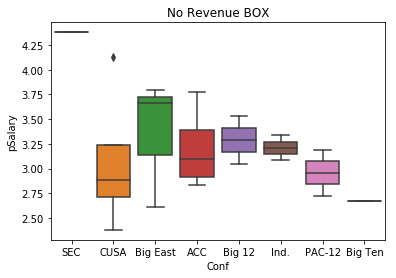

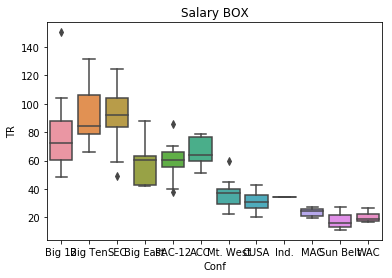

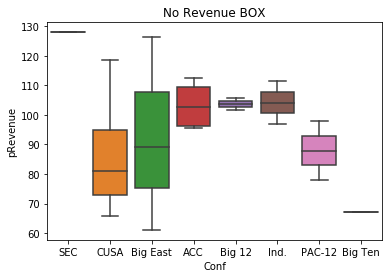

In [141]:
## SUMMARY STATISTICS



sns.boxplot(y="TR", data=TWR)
plt.title('Revenue')
plt.show()
sns.boxplot(y="Salary", data=TWR)
plt.title('Salary')
plt.show()

sns.boxplot(y="pSalary", data=TWR)
plt.title('Salary Model')
plt.show()
sns.boxplot(y="Salary", data=TWR)
plt.title('Actual')
plt.show()

sns.lmplot(x="ACap", y="pSalary", data=TWR)
plt.title('Revenue Salary Model')
plt.show()
sns.lmplot(x="ACap", y="Salary", data=TWR, fit_reg=False, hue='Conf')
plt.title('Salary ACT')
plt.show()

sns.lmplot(x="pRevenue", y="pSalarynr", data=TNR)
plt.title('TNR Salary Model Revenue')
plt.show()
sns.lmplot(x="pRevenue", y="pSalary", data=TNR, fit_reg=False, hue='Conf')
plt.title('NR pSalary/Revenue')
plt.show()

# NUMBER OF PROMOTIONS - ONLY WORKS WITH BINARY VARIABLES


sns.lmplot(x="AvgHAtt", y="pSalary", data=TNR)
plt.title('NR ATT/Salary')
plt.show()
sns.lmplot(x="AvgHAtt", y="pSalary", fit_reg=False, data=TNR, hue='Conf')
plt.title('NR AvgAtt/Salary')
plt.show()

sns.boxplot(x="Conf", y="Salary", data=TWR)
plt.title('Salary BOX')
plt.show()
sns.boxplot(x="Conf", y="pSalary", data=TNR)
plt.title('No Revenue BOX')
plt.show()

sns.boxplot(x="Conf", y="TR", data=TWR)
plt.title('Salary BOX')
plt.show()
sns.boxplot(x="Conf", y="pRevenue", data=TNR)
plt.title('No Revenue BOX')
plt.show()

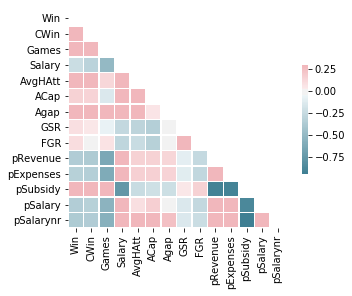

In [128]:
corr = TNR.corr()


# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
#f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

